In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import QuantLib as ql
import quandl

# Problem 1

### Question 2: Build a Jupyter Notebook to demonstrate your calculations using = 0.005; r(0)=0.015, k=0.1, sigma=0.008, gamma=0.0

data preparation

In [15]:
n = range(1,21) # first 20 (most liquid) rolling Eurodollar futures

token = '7Fe845GwTuAehy2o1guA'
nms = ["CHRIS/CME_ED"+str(i) for i in n]
dfs = [quandl.get(nm, authtoken=token) for nm in nms]

# put all settle price into one dataframe
settle_price = dfs[0]['Settle']
for i in range(1,20):
    settle1_price = dfs[i]['Settle']
    settle_price = pd.concat([settle_price,settle1_price], axis=1)
settle_price.columns = ['ED'+str(i) for i in n]
settle_price = settle_price.dropna()
settle_price.head(10)

,ED1,ED2,ED3,ED4,ED5,ED6,ED7,ED8,ED9,ED10,ED11,ED12,ED13,ED14,ED15,ED16,ED17,ED18,ED19,ED20
Date,,,,,,,,,,,,,,,,,,,,
1992-06-23,95.86,95.29,95.18,94.77,94.31,93.75,93.62,93.32,93.05,92.67,92.62,92.41,92.25,91.99,92.01,91.92,91.82,91.59,91.60,91.52
1992-06-24,95.96,95.44,95.34,94.93,94.46,93.89,93.75,93.44,93.17,92.78,92.72,92.49,92.32,92.05,92.07,91.97,91.87,91.65,91.66,91.58
1992-06-25,96.00,95.52,95.42,95.01,94.55,93.98,93.83,93.51,93.22,92.82,92.76,92.53,92.35,92.08,92.09,91.99,91.89,91.67,91.68,91.60
1992-06-26,96.01,95.52,95.42,95.02,94.55,93.97,93.82,93.50,93.21,92.81,92.75,92.52,92.34,92.06,92.07,91.98,91.87,91.64,91.65,91.57
1992-06-29,96.07,95.59,95.49,95.09,94.61,94.03,93.87,93.54,93.24,92.83,92.77,92.53,92.35,92.07,92.07,91.97,91.86,91.63,91.64,91.56
1992-06-30,96.07,95.59,95.49,95.09,94.60,94.02,93.86,93.53,93.23,92.82,92.76,92.52,92.34,92.06,92.06,91.96,91.85,91.62,91.63,91.55
1992-07-01,96.10,95.63,95.53,95.13,94.64,94.06,93.90,93.57,93.27,92.86,92.81,92.57,92.39,92.11,92.11,92.01,91.90,91.67,91.68,91.60
1992-07-02,96.37,95.94,95.86,95.46,94.97,94.37,94.17,93.81,93.48,93.06,93.00,92.76,92.58,92.30,92.30,92.20,92.08,91.84,91.84,91.76
1992-07-06,96.39,95.98,95.92,95.55,95.06,94.46,94.25,93.88,93.54,93.12,93.06,92.82,92.63,92.35,92.35,92.25,92.12,91.88,91.88,91.80


In [16]:
settle = pd.DataFrame()
for i in range(20):
    settle['ED'+str(1+i)] = 100- settle_price.iloc[:,i]
settle.head(10)

,ED1,ED2,ED3,ED4,ED5,ED6,ED7,ED8,ED9,ED10,ED11,ED12,ED13,ED14,ED15,ED16,ED17,ED18,ED19,ED20
Date,,,,,,,,,,,,,,,,,,,,
1992-06-23,4.14,4.71,4.82,5.23,5.69,6.25,6.38,6.68,6.95,7.33,7.38,7.59,7.75,8.01,7.99,8.08,8.18,8.41,8.40,8.48
1992-06-24,4.04,4.56,4.66,5.07,5.54,6.11,6.25,6.56,6.83,7.22,7.28,7.51,7.68,7.95,7.93,8.03,8.13,8.35,8.34,8.42
1992-06-25,4.00,4.48,4.58,4.99,5.45,6.02,6.17,6.49,6.78,7.18,7.24,7.47,7.65,7.92,7.91,8.01,8.11,8.33,8.32,8.40
1992-06-26,3.99,4.48,4.58,4.98,5.45,6.03,6.18,6.50,6.79,7.19,7.25,7.48,7.66,7.94,7.93,8.02,8.13,8.36,8.35,8.43
1992-06-29,3.93,4.41,4.51,4.91,5.39,5.97,6.13,6.46,6.76,7.17,7.23,7.47,7.65,7.93,7.93,8.03,8.14,8.37,8.36,8.44
1992-06-30,3.93,4.41,4.51,4.91,5.40,5.98,6.14,6.47,6.77,7.18,7.24,7.48,7.66,7.94,7.94,8.04,8.15,8.38,8.37,8.45
1992-07-01,3.90,4.37,4.47,4.87,5.36,5.94,6.10,6.43,6.73,7.14,7.19,7.43,7.61,7.89,7.89,7.99,8.10,8.33,8.32,8.40
1992-07-02,3.63,4.06,4.14,4.54,5.03,5.63,5.83,6.19,6.52,6.94,7.00,7.24,7.42,7.70,7.70,7.80,7.92,8.16,8.16,8.24
1992-07-06,3.61,4.02,4.08,4.45,4.94,5.54,5.75,6.12,6.46,6.88,6.94,7.18,7.37,7.65,7.65,7.75,7.88,8.12,8.12,8.20


Model

In [34]:
#1F Affine Model:
#dr(t)=(mu-kappa*r(t))*dt+vol*dW(t)
class Model:
    def __init__(self,r0,mu,vol,kappa): # the first guess
        self.r0 = r0
        self.mu = mu
        self.vol = vol
        self.var = vol*vol
        self.kappa = kappa
        
    def mean_r(self,t,dist='Q'):  # risk neutral method
        m = np.exp(-self.kappa*t)*self.r0 + self.mu/self.kappa*(1-np.exp(-self.kappa*t))
        if (dist == 'F'): # forward method
            m -= self.var * pow(t,2)
        return m
    
    def variance_r(self,t,dist='Q'):
        return self.vol/2/self.kappa*(1-np.exp(-2*self.kappa*t))
    
    def B(self,t,T):
        return (1-np.exp(-self.kappa*(T-t)))/self.kappa
    
    def A(self,t,T):
        return (self.mu/self.kappa-self.vol/2/self.kappa**2)*(self.B(t,T)-T+t) - self.vol*self.B(t,T)**2/self.kappa/4.

    def zero(self,t0,T,r_t0):
        return np.exp(self.A(t0,T)-self.B(t0,T)*r_t0)
    
    def fwd_rate(self,t_fix,T0,T1,dist='Q',accrual=0.25):
        A_diff = self.A(t_fix,T0) - self.A(t_fix,T1)
        B_diff = self.B(t_fix,T0) - self.B(t_fix,T1)
        m = self.mean_r(t_fix,dist)
        v = self.variance_r(t_fix,dist)
        e = np.exp(A_diff-B_diff*m + B_diff**2*v/2.)
        return 1/accrual * (e-1)
    
    def update_params(self,x):
        self.r0=x[0]
        self.mu=x[1]
        self.vol=x[2]
        self.var = pow(x[2],2)
        self.kappa = x[3]

In [35]:
#test Model class:
r0 = 0.015
mu = 0.005
vol = 0.008
kappa = 0.1
m = Model(r0,mu,vol,kappa)
print (m.zero(0,2,r0))

0.9730207891176732


In [36]:
x = range(1,21)
term = [xx/4. for xx in x]
#rate_F = [m.fwd_rate(t,t,t+0.25,'F')*100 for t in term]
rate_Q = [m.fwd_rate(t,t,t+0.25,'Q')*100 for t in term]

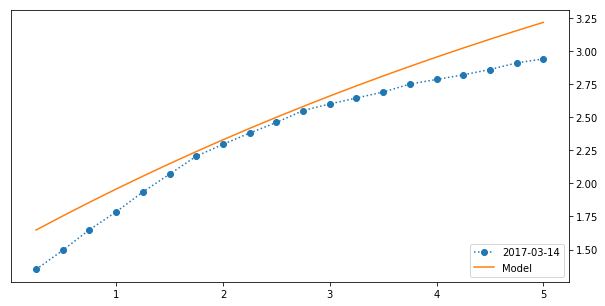

In [19]:
def plot_futures(dt,frame,x,y):
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()  
    crv = frame.loc[dt]
    crv_rates = [z for z in crv.values]
    plots = [plt.plot(x,crv_rates,label=dt,linestyle="dotted",marker='o'),plt.plot(x,y,label='Model')]
    plt.legend(loc='lower right')    
    plt.show()
    
dt = '2017-03-14'
plot_futures(dt,settle,term,rate_Q)
#plot_futures(dt,df,term,rate_F)

### Question3: What changes if gamma != 0?

The mean_r and variance function in class Model will be changed. And also, the other functions including A,B,zero,fwd_rate are also changed.

# Problem 2

In [38]:
settle_sample = settle['2010-01-01':'2012-12-31']
settle_sample.head(10)

,ED1,ED2,ED3,ED4,ED5,ED6,ED7,ED8,ED9,ED10,ED11,ED12,ED13,ED14,ED15,ED16,ED17,ED18,ED19,ED20
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.345,0.625,1.005,1.420,1.820,2.210,2.565,2.890,3.175,3.455,3.700,3.935,4.115,4.290,4.455,4.620,4.745,4.865,4.975,5.090
2010-01-06,0.310,0.535,0.895,1.300,1.695,2.080,2.435,2.775,3.075,3.365,3.620,3.865,4.050,4.225,4.390,4.560,4.685,4.805,4.920,5.040
2010-01-07,0.305,0.530,0.895,1.310,1.720,2.115,2.475,2.815,3.115,3.405,3.665,3.910,4.095,4.270,4.435,4.600,4.725,4.845,4.960,5.080
2010-01-08,0.295,0.485,0.815,1.220,1.625,2.030,2.400,2.750,3.055,3.355,3.620,3.875,4.065,4.245,4.415,4.585,4.715,4.840,4.955,5.080
2010-01-11,0.290,0.470,0.780,1.170,1.575,1.980,2.355,2.710,3.020,3.325,3.600,3.865,4.065,4.250,4.425,4.600,4.735,4.860,4.980,5.105
2010-01-12,0.290,0.450,0.750,1.135,1.530,1.925,2.290,2.635,2.940,3.235,3.495,3.750,3.945,4.125,4.295,4.470,4.605,4.730,4.850,4.975
2010-01-13,0.295,0.475,0.790,1.190,1.590,1.980,2.340,2.680,2.980,3.270,3.530,3.785,3.980,4.165,4.340,4.520,4.655,4.785,4.905,5.035
2010-01-14,0.290,0.440,0.740,1.130,1.525,1.910,2.270,2.610,2.910,3.200,3.460,3.715,3.910,4.100,4.280,4.460,4.595,4.730,4.850,4.980
2010-01-15,0.285,0.420,0.710,1.085,1.470,1.845,2.195,2.530,2.825,3.120,3.385,3.645,3.845,4.040,4.220,4.405,4.540,4.675,4.795,4.920


### 1. Instantiate a Model from Problem 1 and use it as a starting point for parameter estimation

In [39]:
#1F Affine Model:
#dr(t)=(mu-kappa*r(t))*dt+vol*dW(t)
class Model:
    def __init__(self,r0,mu,vol,kappa): # the first guess
        self.r0 = r0
        self.mu = mu
        self.vol = vol
        self.var = vol*vol
        self.kappa = kappa
        
    def mean_r(self,t,dist='Q'):  # risk neutral method
        m = np.exp(-self.kappa*t)*self.r0 + self.mu/self.kappa*(1-np.exp(-self.kappa*t))
        if (dist == 'F'): # forward method
            m -= self.var * pow(t,2)
        return m
    
    def variance_r(self,t,dist='Q'):
        return self.vol/2/self.kappa*(1-np.exp(-2*self.kappa*t))
    
    def B(self,t,T):
        return (1-np.exp(-self.kappa*(T-t)))/self.kappa
    
    def A(self,t,T):
        return (self.mu/self.kappa-self.vol/2/self.kappa**2)*(self.B(t,T)-T+t) - self.vol*self.B(t,T)**2/self.kappa/4.

    def zero(self,t0,T,r_t0):
        return np.exp(self.A(t0,T)-self.B(t0,T)*r_t0)
    
    def fwd_rate(self,t_fix,T0,T1,dist='Q',accrual=0.25):
        A_diff = self.A(t_fix,T0) - self.A(t_fix,T1)
        B_diff = self.B(t_fix,T0) - self.B(t_fix,T1)
        m = self.mean_r(t_fix,dist)
        v = self.variance_r(t_fix,dist)
        e = np.exp(A_diff-B_diff*m + B_diff**2*v/2.)
        return 1/accrual * (e-1)
    
    def update_params(self,x):
        self.r0=x[0]
        self.mu=x[1]
        self.vol=x[2]
        self.var = pow(x[2],2)
        self.kappa = x[3]

In [153]:
#test Model class:
r0 = 0.015
mu = 0.005
vol = 0.008
kappa = 0.1
m = Model(r0,mu,vol,kappa)

In [133]:
x = range(1,21)
term = [xx/4. for xx in x]
rate_F = [m.fwd_rate(t,t,t+0.25,'F')*100 for t in term]
rate_Q = [m.fwd_rate(t,t,t+0.25,'Q')*100 for t in term]

In [134]:
rate_Q

[1.6477217501498664,
 1.754033272587563,
 1.8571997217992298,
 1.9573237274125077,
 2.054504197201279,
 2.1488364645654734,
 2.2404124298428307,
 2.3293206957143653,
 2.415646696954088,
 2.499472824760929,
 2.580878545905829,
 2.659940516912229,
 2.736732693483468,
 2.811326435378181,
 2.883790606929626,
 2.9541916733943907,
 3.02259379330847,
 3.089058907022846,
 3.153646821580569,
 3.2164152920937994]

### 2. Carry out a cross-sectional fit of parameters on a last day of the Sample, check your fit for collinearity

In [259]:
from scipy.optimize import least_squares, leastsq

class Fitter:
    def __init__(self,model,fut_data,terms,dist):
        self.model = model
        self.data = np.array(fut_data)
        self.terms = terms
        self.dist = dist
    
    def residuals(self,x): # x: current level of parameters beting fitted (in model we need to go through parameters)
        m = self.model
        m.update_params(x)
        rate_dist = [m.fwd_rate(t,t,t+0.25,self.dist)*100 for t in self.terms]
        return np.array(rate_dist) - self.data
    
    def fit(self,x0,solver='lm'):
        #return least_squares(self.residuals,x0,method=solver)
        return least_squares(self.residuals,x0,bounds=([0,-np.inf,0,-np.inf],[np.inf,np.inf,np.inf,np.inf]))
        #return leastsq(self.residuals,x0)

In [115]:
m = Model(r0,mu,vol,kappa)
f_fut = Fitter(m,lastday,term,'Q')

In [116]:
fo = f_fut.fit([0.015,0.005,0.008,0.1])
print (fo.x)

[ 0.04772341 -0.213926    1.70394301 -0.00719071]


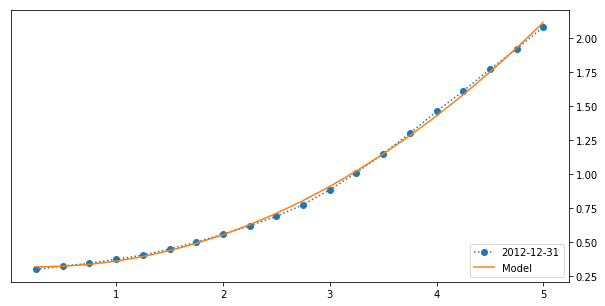

In [128]:
#see the result of fo:
m1 = Model(fo.x[0],fo.x[1],fo.x[2],fo.x[3])
x = range(1,21)
term = [xx/4. for xx in x]
#rate_F1 = [m.fwd_rate(t,t,t+0.25,'F')*100 for t in term]
rate_Q1 = [m1.fwd_rate(t,t,t+0.25,'Q')*100 for t in term]

dt = '2012-12-31'
plot_futures(dt,settle,term,rate_Q1)
#plot_futures(dt,df,term,rate_F)

The model is a good fit.

In [117]:
#jacobian:
jac = fo.jac

c = np.cov(np.transpose(jac))
val, vec = np.linalg.eig(c)
#Condition number:
cn = val[0]/val[2]
print (cn)

1896902061068893.2


There is collinearity because cn is big.

### 3. Apply collinearity remedies (PCA rank reduction or Ridge regression) if your problem is collinear

The idea how to answer this question is:
1. We can have a Jacobian matrix from the fit() function in Fitter
2. We can calculate the PCA of Jacobian with eigenvectors
3. Calculate Pk with eigenvector and PF
4. Add this into the least-square function in Fitter

### 4. Write a pseudo-code for a panel estimation with the whole data set. You can also write real code for extra credit

In [170]:
param_matrix = pd.DataFrame(index=settle_sample.index, columns=['r0','mu','vol','kappa'])

for date in settle_sample.index:
    crv_rate = settle_sample.loc[date,:].values
    
    m = Model(r0,mu,vol,kappa)
    f_fut = Fitter(m,crv_rate,term,'Q')
    
    fo = f_fut.fit([0.015,0.005,0.008,0.1])
    param_matrix.loc[date,:] = fo.x

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


In [121]:
param_matrix.head(10)

,r0,mu,vol,kappa
Date,,,,
2010-01-04,0.0829543,-0.401193,3.36804,0.00779929
2010-01-06,0.111972,-0.544505,4.51195,0.00556214
2010-01-07,0.120206,-0.584701,4.83681,0.00537231
2010-01-08,0.111652,-0.546191,4.52686,0.0055062
2010-01-11,0.110187,-0.54033,4.47825,0.0053461
2010-01-12,0.105714,-0.518384,4.2977,0.00535436
2010-01-13,0.10548,-0.515763,4.27727,0.00539595
2010-01-14,0.113096,-0.553344,4.5744,0.00480658
2010-01-15,0.0995668,-0.488736,4.05311,0.00508802


### 5. Is the estimation badly affected by Eurodollar roll? Would you be better off with constantmaturity data? Reason through this

In [142]:
def error(data, param_matrix, term):
    error = 0
    for date in data.index:
        r0_,mu_,vol_,kappa_ = param_matrix.loc[date,:]
        m_ = Model(r0_,mu_,vol_,kappa_)
        fwd_model = [m_.fwd_rate(t,t,t+0.25,'Q')*100 for t in term]
        fwd_market = data.loc[date]
        error += sum((fwd_model-fwd_market)**2)
    return error

rolling day

In [143]:
error_rolling = error(settle_sample, param_matrix, term)
error_rolling

82.53685346330583

constant maturity day

In [273]:
cons_yield = pd.read_csv('yield_curve.csv')
cons_yield['Date'] = cons_yield['Date'].apply(lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d'))
cons_yield = cons_yield.set_index('Date')
sample_const = cons_yield.ix['2010-01':'2012-12',:-1]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [277]:
param_matrix_const = pd.DataFrame(index=sample_const.index, columns=['r0','mu','vol','kappa'])

for date in sample_const.index:
    crv_rate = sample_const.loc[date,:].values
    
    m = Model(r0,mu,vol,kappa)
    f_fut = Fitter(m,crv_rate,term,'Q')
    
    fo = f_fut.fit([0.015,0.005,0.008,0.1])
    param_matrix_const.loc[date,:] = fo.x

In [279]:
param_matrix_const.head()

,r0,mu,vol,kappa
Date,,,,
2010-01-04,0.0568469,-0.271884,2.33052,0.0110146
2010-01-06,0.108491,-0.523577,4.34123,0.00564008
2010-01-07,0.0931026,-0.450168,3.75743,0.00677129
2010-01-08,0.117347,-0.569153,4.70762,0.00519715
2010-01-11,0.117731,-0.571825,4.72761,0.00499913


In [280]:
error_constant = error(sample_const, param_matrix_const, term)
error_constant

71.4305517435586

Conclusion: The error of constant maturity rate is smaller. The reason is that the model and the constant maturity rate have the same maturity (0, 0.25, 0.5...) but Eurodollar rates maturity is always smaller than (0, 0.25, 0.5...)